In [1]:
import pandas as pd
from distfit import distfit
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def count_workdays(start_date, end_date):
    # 创建日期范围
    date_range = pd.date_range(start=start_date, end=end_date)

    # 过滤出工作日
    workdays = date_range[date_range.weekday < 5]  # 0表示周一，4表示周五

    return len(workdays)

In [57]:
data = pd.read_excel('副本有效数据.xlsx')
data['diff'] = np.zeros(542)
dt = pd.DataFrame()
dt['受理日期'] = pd.to_datetime(data['受理日期'] )
for i in dt.index:
    if not i == 541:
        data['diff'][i+1] = count_workdays(dt['受理日期'][i],dt['受理日期'][i+1])-1
        if data['diff'][i+1] < 0:
            data['diff'][i+1] = 0

data['diff'].describe()


count    542.000000
mean       1.573801
std        3.764448
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       45.000000
Name: diff, dtype: float64

Text(0.5, 1.0, 'Raw arrival data distribution')

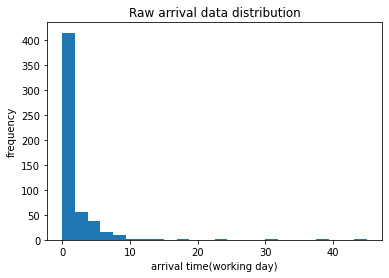

In [14]:
plt.hist(data['diff'],bins = 24)
plt.xlabel('arrival time(working day)')
plt.ylabel('frequency')
plt.title('Raw arrival data distribution')

In [58]:
data = data[data['diff']<15]


X = data['diff']

Text(0.5, 1.0, 'Processed arrival data distribution')

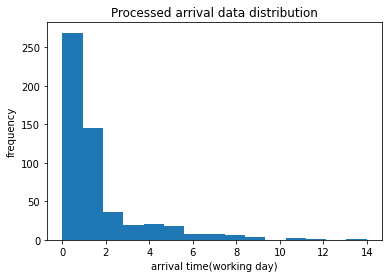

In [61]:

plt.hist(X,bins=15)
plt.xlabel('arrival time(working day)')
plt.ylabel('frequency')
plt.title('Processed arrival data distribution')

In [62]:
dist = distfit()
dist.alpha = 0.05  # 设置 CII KS 检验的显著性水平为 1%
dist.distributions = [
    'norm', 'expon', 'pareto', 'dweibull', 't', 'gamma', 'lognorm', 'beta',
    'uniform', 'loggamma', 'genextreme', 'weibull', 'triang', 'cauchy', 'chi2'
]  # 添加要测试的分布
dist.fit_transform(X)
dist.model
# 绘制分布图像
dist.summary

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 4.71186] [loc=1.257 scale=2.079]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 3.35176] [loc=0.000 scale=1.257]
[distfit] >INFO> [pareto    ] [0.04 sec] [RSS: 5.53136] [loc=-0.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 4.66226] [loc=1.000 scale=1.515]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 5.5349] [loc=0.000 scale=0.000]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 5.53547] [loc=0.000 scale=0.000]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 3.62675] [loc=-0.000 scale=3.196]
[distfit] >INFO> [lognorm   ] [0.07 sec] [RSS: 4.7587] [loc=-0.000 scale=0.173]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 2.47563] [loc=-0.000 scale=107.250]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5.24466] [loc=0.000 scale=14.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 4.72681] [loc=-506.898 scale=71.917]
[distfit] >INFO> Compute confidence intervals [parametric]


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,beta,2.475627,-0.0,107.249899,"(0.890983796009809, 167.18361730008675)","(0.890983796009809, 167.18361730008675, -2.688...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#e41a1c
1,expon,3.351761,0.0,1.257463,(),"(0.0, 1.257462686567164)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#e41a1c
2,gamma,3.62675,-0.0,3.19643,"(0.7838728799263317,)","(0.7838728799263317, -1.0167853371002437e-28, ...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#377eb8
3,dweibull,4.662258,1.0,1.515076,"(0.31317669325008524,)","(0.31317669325008524, 1.0000000000000002, 1.51...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#4daf4a
4,norm,4.711861,1.257463,2.078887,(),"(1.257462686567164, 2.078887362633713)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#984ea3
5,loggamma,4.726806,-506.897687,71.916816,"(1172.1656544239495,)","(1172.1656544239495, -506.89768732944265, 71.9...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#ff7f00
6,lognorm,4.758705,-0.0,0.173434,"(17.423799507063094,)","(17.423799507063094, -2.9587234765881913e-23, ...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#ffff33
7,uniform,5.244656,0.0,14.0,(),"(0.0, 14.0)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#a65628
8,pareto,5.531362,-0.0,0.0,"(0.2271429052054601,)","(0.2271429052054601, -7.601464195212492e-16, 4...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#f781bf
9,t,5.534899,0.0,0.0,"(0.20191023699435617,)","(0.20191023699435617, 2.7501135605625196e-20, ...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#999999


[distfit] >INFO> Bootstrap for 11 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [beta      ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [expon     ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [gamma     ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [dweibull  ] > Score: 0.06 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [norm      ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [loggamma  ] > Score: 0 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [lognorm   ] > Score: 0.96 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [uniform   ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [pareto    ] > Score: 0.17 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [t         ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [genextreme] > Score: 1 > Pass 95% CII KS-test: True      
[distfit] >INFO> Upd

(<Figure size 1440x720 with 2 Axes>,
 <Axes: title={'center': 'Genextreme (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

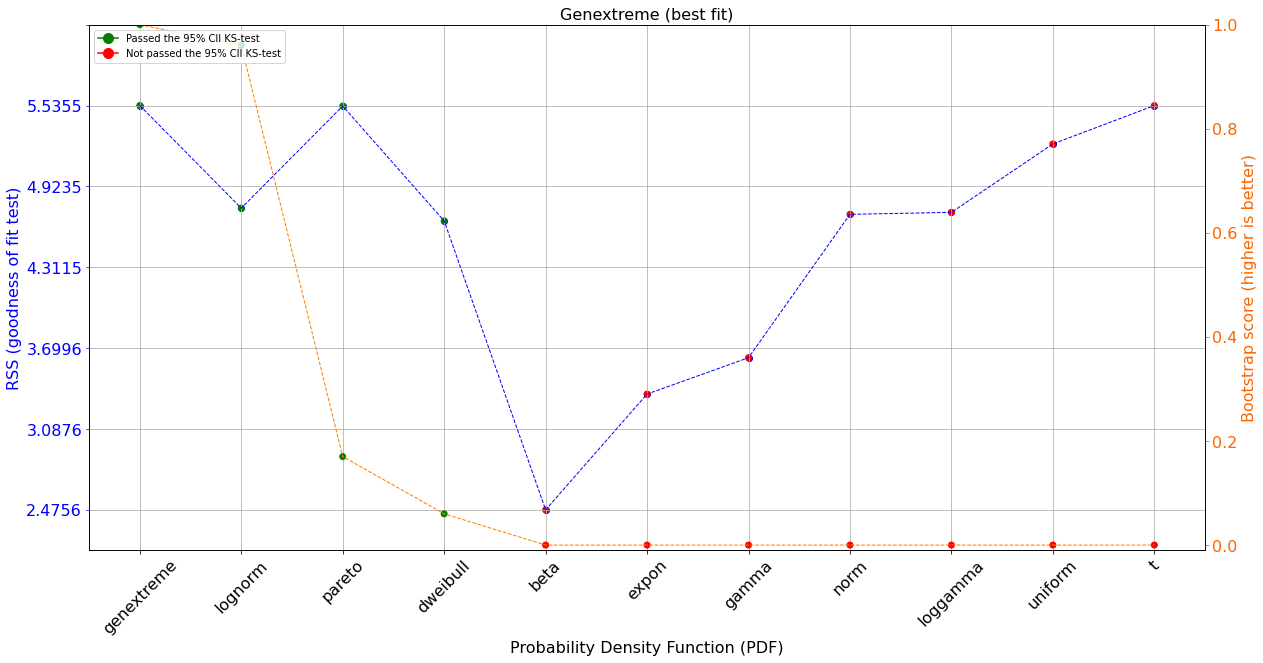

In [63]:
results = dist.bootstrap(X, n_boots=100)
dist.plot_summary()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.07 sec] [RSS: 4.7587] [loc=-0.000 scale=0.173]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Bootstrap for 1 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [lognorm] > Score: 0.96 > Pass 95% CII KS-test: True   
[distfit] >INFO> Updating model to: [Lognorm]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-0.000000, scale:0.173434)


(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=17.4238, loc=-2.95872e-23, scale=0.173434)'}, xlabel='Values', ylabel='Frequency'>)

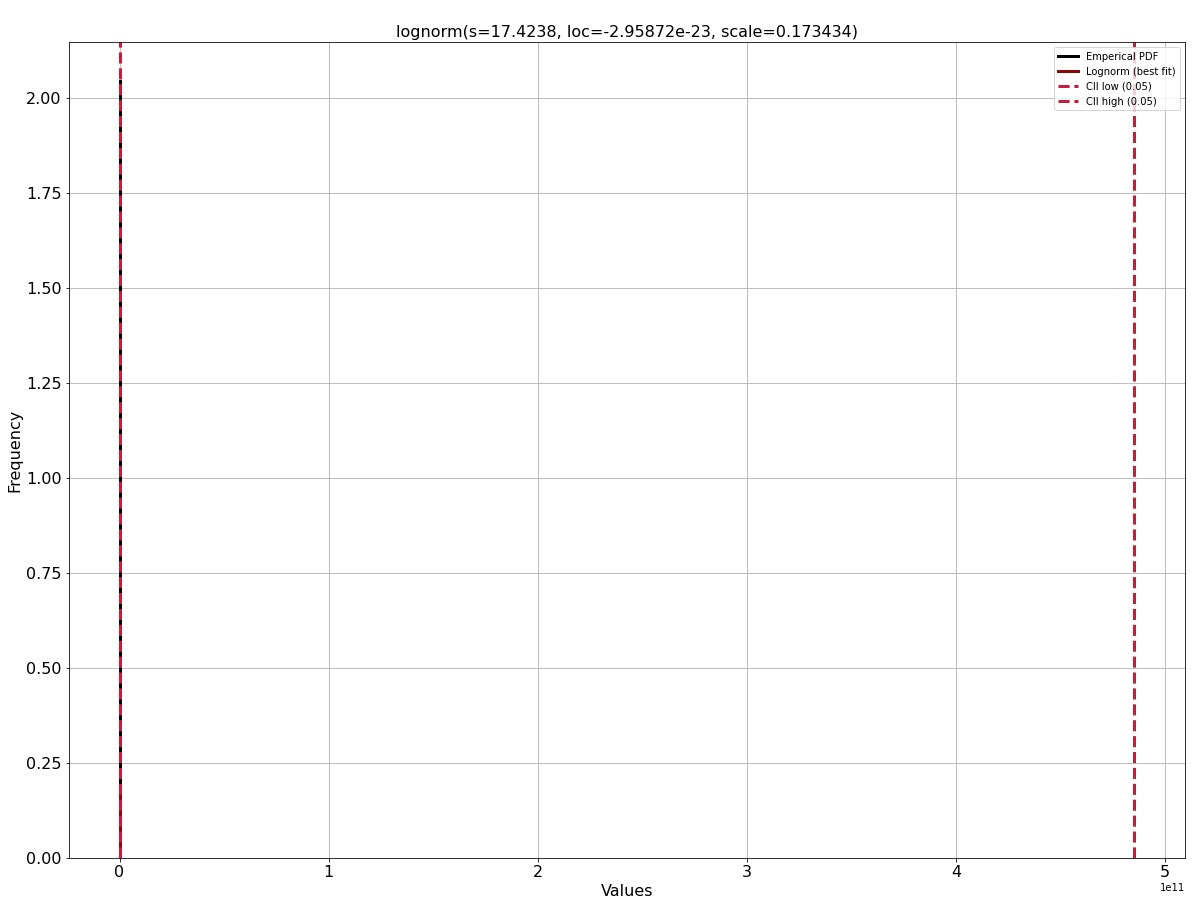

In [64]:
dfit = distfit(distr='lognorm')
results = dfit.fit_transform(X)
results = dfit.bootstrap(X, n_boots=100)
dfit.plot()

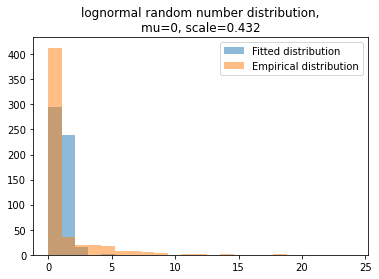

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import lognorm

size = 550
rvs = lognorm.rvs(0.432,0, size=size)

bins = np.linspace(0, 24, 24)
plt.title('lognormal random number distribution,\nmu=0, scale=0.432')
plt.hist(rvs,bins,alpha=0.5,label='Fitted distribution')
plt.hist(X,bins,alpha=0.5,label='Empirical distribution')
plt.legend(loc='upper right')
plt.show()